In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import pandas as pd  

In [2]:
# Data loading...
#C1 (records not containing acute hypotensive episodes)
#C2 (AHE, but not in forecast window)
#H1 (acute hypotensive episode in forecast window, treated with pressors)
#H2 (AHE in forecast window, not treated with pressors)
c1 = np.loadtxt('c1_matrix.txt') #14x600
c2 = np.loadtxt('c2_matrix.txt') #14x600
h1 = np.loadtxt('h1_matrix.txt') #14x600
h2 = np.loadtxt('h2_matrix.txt') #15x600
c1_afterT0=np.loadtxt('c1_matrix_afterT0.txt') #14x60
c2_afterT0=np.loadtxt('c2_matrix_afterT0.txt') #14x60
h1_afterT0=np.loadtxt('h1_matrix_afterT0.txt') #14x60
h2_afterT0=np.loadtxt('h2_matrix_afterT0.txt') #15x60
labels=np.loadtxt('labels.txt')

In [32]:
testA=np.loadtxt('test_a.txt')
testB=np.loadtxt('test_b.txt')
print(testA.shape,testB.shape) 

(9, 600) (40, 600)


In [213]:
#solve the problem with nan in testB
idx_nan=np.isnan(testB)
print(len(idx_nan))
testB[idx_nan]=0

40


# Way 1
## Feature Extraction in Training dataset-- Linear Regression

In [33]:
#used to store the features
list_feature=[]
#store the predictions after T0 
#used for Linear Regression-->predict to count the ABPmean value
pred_afterT0=[]

Dict={'C1':c1,'C2':c2,'H1':h1,'H2':h2}
print('mean of ABPmean above the line\nmean below the line\nsize+\nsize-\n')
for k,v in Dict.items():
    print('This is',k)
    for i in range(len(v)):
        y=v[i]
        cond=np.where(((y>130)|(y<10)),-1,y)
        y=np.delete(cond,np.argwhere(cond==-1))

        x=np.arange(len(y))
        model = LinearRegression()

        model.fit(np.reshape(x,[len(x),1]), np.reshape(y,[len(y),1]))
        x_test=x_test=np.arange(len(x),len(x)+60)
        y_pred = model.predict(np.reshape(x_test,[len(x_test),1]))

        w = model.coef_[0][0] # parameters of model
        b = model.intercept_[0] #intercept of model

        g1=np.where(y>w*x+b,y,-1).flatten()
        g11=np.delete(g1,np.argwhere(g1==-1))
        g11_mean=np.mean(g11)

        g2=np.where(y<w*x+b,y,-1).flatten()
        g21=np.delete(g2,np.argwhere(g2==-1))
        g21_mean=np.mean(g21)
#         list_feature.append([g11_mean,g21_mean,len(g11),len(g21)])
        list_feature.append([g11_mean,g21_mean,len(g11)])
        pred_afterT0.append(y_pred.flatten())
        print('Patient',i+1, 'in ',k,':','%0.2f'%g11_mean,'%0.2f'%g21_mean,len(g11),len(g21))
        
#convert into the type of numpy.arry
list_feature=np.array(list_feature)
pred_afterT0=np.array(pred_afterT0)

mean of ABPmean above the line
mean below the line
size+
size-

This is C1
Patient 1 in  C1 : 97.18 85.80 282 318
Patient 2 in  C1 : 90.99 85.00 307 292
Patient 3 in  C1 : 112.81 90.68 290 266
Patient 4 in  C1 : 111.21 104.33 355 242
Patient 5 in  C1 : 105.50 94.76 274 318
Patient 6 in  C1 : 101.90 98.96 267 331
Patient 7 in  C1 : 109.74 90.02 313 287
Patient 8 in  C1 : 109.63 102.79 248 315
Patient 9 in  C1 : 92.36 77.30 321 279
Patient 10 in  C1 : 101.29 81.69 310 289
Patient 11 in  C1 : 84.00 75.87 299 301
Patient 12 in  C1 : 103.56 94.93 281 319
Patient 13 in  C1 : 82.05 75.45 242 357
Patient 14 in  C1 : 82.92 75.27 259 341
This is C2
Patient 1 in  C2 : 78.56 70.49 296 304
Patient 2 in  C2 : 92.29 84.19 307 292
Patient 3 in  C2 : 87.49 77.11 255 337
Patient 4 in  C2 : 75.39 62.84 270 323
Patient 5 in  C2 : 97.46 81.67 331 268
Patient 6 in  C2 : 89.66 76.51 314 285
Patient 7 in  C2 : 90.78 74.59 321 279
Patient 8 in  C2 : 119.54 95.32 194 158
Patient 9 in  C2 : 71.75 66.34 251 349
P

## Feature Extraction in Test dataset-- Linear Regression

In [41]:
#used to store the features
testset_feature=[]
#store the predictions(60points) after T0 
#used for Linear Regression-->predict to count the ABPmean value
testset_pred_afterT0=[]

Dict={'testA':testA,'testB':testB}
print('mean of ABPmean above the line\nmean below the line\nsize+\nsize-\n')
for k,v in Dict.items():
    print('This is',k)
    for i in range(len(v)):
        y=v[i]
        cond=np.where(((y>130)|(y<10)),-1,y)
        y=np.delete(cond,np.argwhere(cond==-1))

        x=np.arange(len(y))
        model = LinearRegression()

        model.fit(np.reshape(x,[len(x),1]), np.reshape(y,[len(y),1]))
        x_test=x_test=np.arange(len(x),len(x)+60)
        y_pred = model.predict(np.reshape(x_test,[len(x_test),1]))

        w = model.coef_[0][0] # parameters of model
        b = model.intercept_[0] #intercept of model

        g1=np.where(y>w*x+b,y,-1).flatten()
        g11=np.delete(g1,np.argwhere(g1==-1))
        g11_mean=np.mean(g11)

        g2=np.where(y<w*x+b,y,-1).flatten()
        g21=np.delete(g2,np.argwhere(g2==-1))
        g21_mean=np.mean(g21)
        testset_feature.append([g11_mean,g21_mean,len(g11)])
        testset_pred_afterT0.append(y_pred.flatten())
        print('Patient',i+1, 'in ',k,':','%0.2f'%g11_mean,'%0.2f'%g21_mean,len(g11),len(g21))
        
#convert into the type of numpy.arry
testset_feature=np.array(testset_feature)
testset_pred_afterT0=np.array(testset_pred_afterT0)

testA_feature=testset_feature[:len(testA)]
testB_feature=testset_feature[len(testA):]
testA_pred_afterT0=testset_pred_afterT0[:len(testA)]
testB_pred_afterT0=testset_pred_afterT0[len(testA):]

mean of ABPmean above the line
mean below the line
size+
size-

This is testA
Patient 1 in  testA : 72.30 63.84 252 348
Patient 2 in  testA : 75.45 67.33 315 285
Patient 3 in  testA : 71.69 62.34 236 363
Patient 4 in  testA : 85.31 69.38 233 366
Patient 5 in  testA : 105.40 91.34 274 317
Patient 6 in  testA : 95.79 80.37 240 360
Patient 7 in  testA : 75.59 69.88 296 304
Patient 8 in  testA : 72.96 66.89 241 359
Patient 9 in  testA : 62.74 58.04 280 317
This is testB
Patient 1 in  testB : 92.05 85.54 270 330
Patient 2 in  testB : 71.17 62.66 210 388
Patient 3 in  testB : 66.43 61.59 269 331
Patient 4 in  testB : 92.51 84.22 315 285
Patient 5 in  testB : 81.66 71.52 244 356
Patient 6 in  testB : 76.81 69.35 271 329
Patient 7 in  testB : 90.48 77.77 242 356
Patient 8 in  testB : 112.54 104.82 296 303
Patient 9 in  testB : 84.93 69.90 265 335
Patient 10 in  testB : 84.36 77.15 307 285
Patient 11 in  testB : 100.84 94.00 289 309
Patient 12 in  testB : 88.64 73.52 210 383
Patient 13 in  test

## Classification --Random Forest in Way 1

In [7]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

In [48]:
'''
split the data into train and test parts for training in CrossValidation
'''
testsize=10
# testIdx=np.random.choice(len(list_feature), testsize,replace=False)
idx=np.random.permutation(len(list_feature))
trainIdx=idx[testsize:]
testIdx=idx[:testsize]

print(testIdx)
x_train=list_feature[trainIdx]
x_test=list_feature[testIdx]
print(x_train.shape,x_test.shape)
y_train=labels[trainIdx]
y_test=labels[testIdx]
print(y_train.shape,y_test.shape)

[55 12 31 25 26  7 46 29 32 17]
(47, 3) (10, 3)
(47,) (10,)


In [94]:
%%time
rf_test = RandomForestClassifier(n_estimators= 50,max_depth=4,random_state=10,criterion='gini')
rf_test.fit(x_train,y_train)
y_pred=rf_test.predict(x_test)
print (y_pred)
print(y_test)
print('the accuracy is:',accuracy_score(y_test,y_pred))

[1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]
[1. 0. 1. 0. 0. 0. 1. 1. 1. 0.]
the accuracy is: 0.7
CPU times: user 71.1 ms, sys: 3.07 ms, total: 74.2 ms
Wall time: 73.4 ms


In [22]:
%%time
'''
Tuning the parameters of RandomForest via GridSearchCV
'''
params= {'n_estimators':np.arange(10,100,10),'min_samples_leaf':np.arange(1,50,3),
         'max_depth':np.arange(2,10,2)}  
cv_rf= GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid =params, scoring='roc_auc',cv=5)  
cv_rf.fit(list_feature,labels)  
# y_pred=cv_rf.predict(x_test)
print('the best params of the model:\n',cv_rf.best_params_)
# print('the accuracy is:',accuracy_score(y_test,y_pred))
print('Mean cross-validated score of the best_estimator :',cv_rf.best_score_)

the best params of the model:
 {'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 50}
Mean cross-validated score of the best_estimator : 0.7543859649122808
CPU times: user 3min 12s, sys: 528 ms, total: 3min 13s
Wall time: 3min 14s


In [150]:
#save the model1
joblib.dump(cv_rf,'randomforest1.m')

['randomforest1.m']

In [151]:
#read the model
rf=joblib.load('randomforest.m')
resultA=rf.predict(testA_feature)
resultB=rf.predict(testB_feature)
print('Way 1 with Random Forest:')
print('the number of AHE in testA',np.sum(resultA))
print('the number of AHE in testB',np.sum(resultB))

Way 1 with Random Forest:
the number of AHE in testA 7.0
the number of AHE in testB 17.0


## Classification--Support Vector Machine in Way 1

In [119]:
from sklearn.svm import SVC
#use the optimal parameters to construct the SVC model
clf_test = SVC(kernel='rbf',gamma=1e-3,C=5)
clf_test.fit(x_train,y_train)

#predict the test data
y_pred = clf_test.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('the accuracy of the classification is %0.3f'%accuracy)

the accuracy of the classification is 0.500


In [133]:
%%time
'''
Tuning the parameters of SVC via GridSearchCV
'''
#C is the Penalty parameter of the error term.
params_svc= {'C':np.arange(1,50,1),'gamma':np.linspace(1e-9,20,2000)}  
cv_clf= GridSearchCV(estimator = SVC(decision_function_shape='ovo',kernel='rbf',max_iter=-1, 
                                     probability=False, random_state=None, 
                                     shrinking=True,tol=0.001, verbose=False),
                                     param_grid = params_svc, cv=5) 
cv_clf.fit(list_feature,labels)
print(cv_clf.best_params_)
print('Mean cross-validated score of the best_estimator :',cv_clf.best_score_)

{'C': 11, 'gamma': 0.010005003500750375}
Mean cross-validated score of the best_estimator : 0.7543859649122807
CPU times: user 17min 34s, sys: 19.7 s, total: 17min 54s
Wall time: 18min 53s


In [153]:
#save the model1
joblib.dump(cv_clf,'SVC1.m')

['SVC1.m']

In [156]:
#save the model1_1
joblib.dump(cv_clf,'SVC1_1.m')

['SVC1_1.m']

In [155]:
cv_clf=joblib.load('SVC2.m')
resultA=cv_clf.predict(testA_feature)
resultB=cv_clf.predict(testB_feature)
print('Way 1 with Support Vector Machine:')
print('the number of AHE in testA',np.sum(resultA))
print('the number of AHE in testB',np.sum(resultB))

Way 1 with Support Vector Machine:
the number of AHE in testA 3.0
the number of AHE in testB 19.0


# Way 2

## Linear Regression to fit the data after T0

(556,)


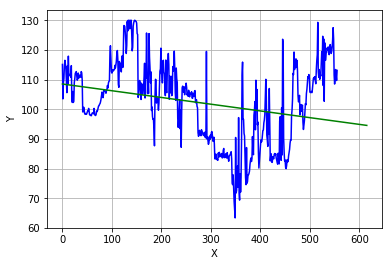

In [31]:
#Example for visualization
#the third patient in c1
y=c1[2]
#select the value between 10 and 130
cond=np.where(((y>130)|(y<10)),-1,y).flatten()
y=np.delete(cond,np.argwhere(cond==-1))
print(y.shape)
x=np.arange(len(y))

model = LinearRegression()
model.fit(np.reshape(x,[len(x),1]), np.reshape(y,[len(y),1]))
# x_test=np.arange(len(x),len(x)+60)
x_test=np.arange(len(x)+60)
y_pred = model.predict(np.reshape(x_test,[len(x_test),1]))
w = model.coef_[0][0] # parameters of model
b = model.intercept_[0] #intercept of model

plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(x,y,'b') 
plt.plot(x_test,y_pred,'g-') 
plt.show()

In [140]:
pred_afterT0.shape
labels.shape

(57,)

In [26]:
s=np.where(pred_afterT0>87,0,1)
counts=s.sum(axis=1)
#any period of 30 minutes or more during which at least 90% of 
#the MAP measurements were at or below 60 mmHg.
results=np.where(counts>27,1,0)
print('the accuracy is:',accuracy_score(labels,results))
print(counts)
print(results)

the accuracy is: 0.6491228070175439
[ 0  0  0  0  0  0  0  0  0  0 60  0 60 60 60  0  0 60  0  0 60  0 60 60
 60 60 60 60  0  0 60 60 60  0 60 60 60 60 60  0  0 60 36 60 60 60 60 60
 60 60  0  0 60 60 60 60  0]
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0]


## Random Forest in Way 2

In [159]:
%%time
'''
Tuning the parameters of RandomForest via GridSearchCV
'''
params_rf2= {'n_estimators':np.arange(10,100,10),'min_samples_leaf':np.arange(1,50,3),
         'max_depth':np.arange(1,10,1)}  
cv_rf2= GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid =params_rf2,cv=5)  
cv_rf2.fit(pred_afterT0,labels)  
print('the best params of the model:\n',cv_rf2.best_params_)
print('Mean cross-validated score of the best_estimator :',cv_rf2.best_score_)

the best params of the model:
 {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 70}
Mean cross-validated score of the best_estimator : 0.6491228070175439
CPU times: user 7min 58s, sys: 3.32 s, total: 8min 2s
Wall time: 8min 13s


In [157]:
#save the model2
joblib.dump(cv_rf2,'randomforest2.m')

['randomforest2.m']

In [161]:
joblib.dump(cv_rf2,'randomforest2_1.m')

['randomforest2_1.m']

In [212]:
cv_rf2=joblib.load('randomforest2_1.m')
resultA=cv_rf2.predict(testA_pred_afterT0)
resultB=cv_rf2.predict(testB_pred_afterT0)
print('Way 2 with Random Forest:')
print('the number of AHE in testA',np.sum(resultA))
print('the number of AHE in testB',np.sum(resultB))

Way 2 with Random Forest:
the number of AHE in testA 4.0
the number of AHE in testB 20.0


## Support Vector Machine in Way 2

In [194]:
%%time
'''
Tuning the parameters of SVC via GridSearchCV
'''
#C is the Penalty parameter of the error term.
params_svc2= {'C':np.arange(1,20,1),'gamma':np.linspace(1e-9,20,5000)}  
cv_clf2= GridSearchCV(estimator = SVC(decision_function_shape='ovo',kernel='rbf',max_iter=-1, 
                                     probability=False, random_state=None, 
                                     shrinking=True,tol=0.001, verbose=False),
                                     param_grid = params_svc2, cv=5) 
cv_clf2.fit(pred_afterT0,labels)
print(cv_clf2.best_params_)
print('Mean cross-validated score of the best_estimator :',cv_clf2.best_score_)

{'C': 2, 'gamma': 0.004000801159831967}
Mean cross-validated score of the best_estimator : 0.6842105263157895
CPU times: user 16min 12s, sys: 5.57 s, total: 16min 18s
Wall time: 16min 31s


In [168]:
#save the model2
joblib.dump(cv_clf2,'SVC2.m')

['SVC2.m']

In [200]:
joblib.dump(cv_clf2,'SVC2_1.m')

['SVC2_1.m']

In [201]:
cv_clf2=joblib.load('SVC2_1.m')
resultA=cv_clf2.predict(testA_pred_afterT0)
resultB=cv_clf2.predict(testB_pred_afterT0)
print('Way 2 with Support Vector Machine:')
print('the number of AHE in testA',np.sum(resultA))
print('the number of AHE in testB',np.sum(resultB))

Way 2 with Support Vector Machine:
the number of AHE in testA 6.0
the number of AHE in testB 24.0


# Way 3
## Calculate per average value before 3hours as the value after T0

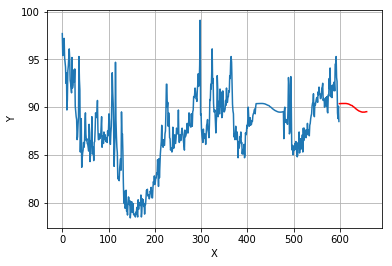

In [202]:
#Example for visualizaiton
#the first patient in h2
y=c1[1]
#select the value between 10 and 130
cond=np.where(((y>130)|(y<10)),-1,y).flatten()
y=np.delete(cond,np.argwhere(cond==-1))

#180 means 3 hours (240 means 4hours)
segment_size=180
ys=y[-segment_size:]
y_avg_pred=np.zeros(60)
for i in range(60):
    y_avg_pred[i]=np.mean(ys)
    ys[i]=y_avg_pred[i]

plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True) 
plt.plot(range(len(y)),y) 
plt.plot(range(len(y),len(y)+60),y_avg_pred,'r-') 
plt.show()
    

### Training set

In [203]:
#store the predictions after T0 
#Calculate per average value before 3hours as the value after T0¶
avgpred_afterT0=[]

segment_size=180
Dict={'C1':c1,'C2':c2,'H1':h1,'H2':h2}
for k,v in Dict.items():
    for i in range(len(v)):
        
        y=v[i]
        cond=np.where(((y>130)|(y<10)),-1,y)
        y=np.delete(cond,np.argwhere(cond==-1))   
        
        ys=y[-segment_size:]
        y_avg_pred=np.zeros(60)
        for i in range(60):
            y_avg_pred[i]=np.mean(ys)
            ys[i]=y_avg_pred[i]

        avgpred_afterT0.append(y_avg_pred)
        
#convert into the type of numpy.arry
avgpred_afterT0=np.array(avgpred_afterT0)

print(avgpred_afterT0.shape)

(57, 60)


### Testing set

In [204]:
#store the predictions after T0 
#Calculate per average value before 3hours as the value after T0¶
testA_avgpred_afterT0=[]
testB_avgpred_afterT0=[]
segment_size=180
for i in range(len(testA)):
    y=testA[i]
    cond=np.where(((y>130)|(y<10)),-1,y)
    y=np.delete(cond,np.argwhere(cond==-1))

    ys=y[-segment_size:]
    y_avg_pred=np.zeros(60)
    for i in range(60):
        y_avg_pred[i]=np.mean(ys)
        ys[i]=y_avg_pred[i]
    testA_avgpred_afterT0.append(y_avg_pred)   
    
for i in range(len(testB)):
    y=testB[i]
    cond=np.where(((y>130)|(y<10)),-1,y)
    y=np.delete(cond,np.argwhere(cond==-1))

    ys=y[-segment_size:]
    y_avg_pred=np.zeros(60)
    for i in range(60):
        y_avg_pred[i]=np.mean(ys)
        ys[i]=y_avg_pred[i]
    testB_avgpred_afterT0.append(y_avg_pred)   
    
#convert into the type of numpy.arry
testA_avgpred_afterT0=np.array(testA_avgpred_afterT0)
testB_avgpred_afterT0=np.array(testB_avgpred_afterT0)

print(testA_avgpred_afterT0.shape,testB_avgpred_afterT0.shape)

(9, 60) (40, 60)


## Random Forest in Way 3

In [205]:
%%time
'''
Tuning the parameters of RandomForest via GridSearchCV
'''
params_rf3= {'n_estimators':np.arange(2,100,5),'min_samples_leaf':np.arange(1,50,2),
         'max_depth':np.arange(1,10,1)}  
cv_rf3= GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid =params_rf3,cv=5)  
cv_rf3.fit(avgpred_afterT0,labels)  
print('the best params of the model:\n',cv_rf3.best_params_)
print('Mean cross-validated score of the best_estimator :',cv_rf3.best_score_)

the best params of the model:
 {'max_depth': 1, 'min_samples_leaf': 15, 'n_estimators': 47}
Mean cross-validated score of the best_estimator : 0.6666666666666666
CPU times: user 23min 58s, sys: 5.3 s, total: 24min 4s
Wall time: 32min 26s


In [206]:
#save the model3
joblib.dump(cv_rf3,'randomforest3.m')

['randomforest3.m']

In [207]:
cv_rf3=joblib.load('randomforest3.m')
resultA=cv_rf3.predict(testA_avgpred_afterT0)
resultB=cv_rf3.predict(testB_avgpred_afterT0)
print('Way 3 with Random Forest:')
print('the number of AHE in testA',np.sum(resultA))
print('the number of AHE in testB',np.sum(resultB))

Way 3 with Random Forest:
the number of AHE in testA 8.0
the number of AHE in testB 28.0


## Support Vector Machine in Way 3

In [208]:
%%time
'''
Tuning the parameters of SVC via GridSearchCV
'''
#C is the Penalty parameter of the error term.
params_svc3= {'C':np.arange(1,20,1),'gamma':np.linspace(1e-9,20,6000)}  
cv_clf3= GridSearchCV(estimator = SVC(decision_function_shape='ovo',kernel='rbf',max_iter=-1, 
                                     probability=False, random_state=None, 
                                     shrinking=True,tol=0.001, verbose=False),
                                     param_grid = params_svc3, cv=5) 
cv_clf3.fit(avgpred_afterT0,labels)
print(cv_clf3.best_params_)
print('Mean cross-validated score of the best_estimator :',cv_clf3.best_score_)

{'C': 1, 'gamma': 0.006667778962660444}
Mean cross-validated score of the best_estimator : 0.631578947368421
CPU times: user 19min 57s, sys: 8.53 s, total: 20min 5s
Wall time: 20min 20s


In [209]:
#save the model2
joblib.dump(cv_clf3,'SVC3.m')

['SVC3.m']

In [210]:
# cv_clf3=joblib.load('SVC3.m')
resultA=cv_clf3.predict(testA_avgpred_afterT0)
resultB=cv_clf3.predict(testB_avgpred_afterT0)
print('Way 3 with Support Vector Machine:')
print('the number of AHE in testA',np.sum(resultA))
print('the number of AHE in testB',np.sum(resultB))

Way 3 with Support Vector Machine:
the number of AHE in testA 6.0
the number of AHE in testB 29.0


# Kernel Ridge Regression

(600,)
(66000, 1)


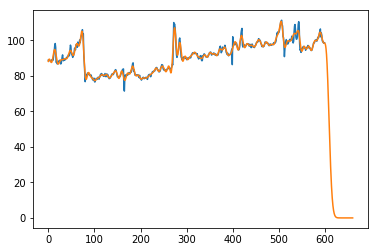

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

#Example
#the first patient in c1
y=c1[0]
#select the value between 10 and 130
cond=np.where(((y>130)|(y<10)),-1,y).flatten()
y=np.delete(cond,np.argwhere(cond==-1))
print(y.shape)
x=np.arange(len(y)).reshape(len(y),1)

x_test=np.arange(0,len(x)+60,0.01).reshape((len(x)+60)*100,1)
print(x_test.shape)
train_size=600
krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
krr.fit(x[:train_size], y[:train_size])
y_pred=krr.predict(x_test)
plt.plot(x,y)
plt.plot(x_test,y_pred)
plt.show()


# Time series Analysis ---to be continued

In [5]:
from pandas import Series
import pandas

In [16]:
test=Series.from_csv('a40282n.csv',header=None)
# p=pandas.read_csv('a40282n.csv',header=None)
test.head()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


'[10:00:00 30/06/2016]'    60.3
'[10:01:00 30/06/2016]'    64.3
'[10:02:00 30/06/2016]'    60.9
'[10:03:00 30/06/2016]'    59.8
'[10:04:00 30/06/2016]'    60.5
dtype: float64